In [1]:
# Exploratory Data Analysis
import pandas as pd  #for data analysis and transformation
import numpy as np   #for array manipulation
import matplotlib.pyplot as plt         #for graph plot
import seaborn as sns  #library for making statistical graphics in Python

In [10]:
data = pd.read_csv('odi-batting.csv')

In [3]:
data

,Country,Player,Runs,ScoreRate,MatchDate,Weekday,Ground,Versus
0,Afghanistan,Mohammad Shahzad,118.0,97.52,16-02-2010,Tue,Sharjah CA Stadium,Canada
1,Afghanistan,Mohammad Shahzad,110.0,99.09,01-09-2009,Tue,VRA Ground,Netherlands
2,Afghanistan,Mohammad Shahzad,100.0,138.88,16-08-2010,Mon,Cambusdoon New Ground,Scotland
3,Afghanistan,Mohammad Shahzad,82.0,75.92,10-07-2010,Sat,Hazelaarweg,Netherlands
4,Afghanistan,Mohammad Shahzad,57.0,100.00,01-07-2010,Thu,Sportpark Westvliet,Canada
...,...,...,...,...,...,...,...,...
55921,Zimbabwe,Waddington Mwayenga,0.0,0.00,27-05-2004,Thu,Harare Sports Club,Australia
55922,Zimbabwe,Tafadzwa Kamungozi,0.0,0.00,10-10-2006,Tue,Sardar Patel Stadium,Sri Lanka
55923,Zimbabwe,Tafadzwa Kamungozi,0.0,0.00,08-10-2006,Sun,Sardar Patel Stadium,West Indies
55924,Zimbabwe,Tafadzwa Kamungozi,0.0,0.00,13-10-2006,Fri,Sawai Mansingh Stadium,Bangladesh


In [5]:
data.shape

(55926, 8)

In [6]:
data.head()

,Country,Player,Runs,ScoreRate,MatchDate,Weekday,Ground,Versus
0,Afghanistan,Mohammad Shahzad,118.0,97.52,16-02-2010,Tue,Sharjah CA Stadium,Canada
1,Afghanistan,Mohammad Shahzad,110.0,99.09,01-09-2009,Tue,VRA Ground,Netherlands
2,Afghanistan,Mohammad Shahzad,100.0,138.88,16-08-2010,Mon,Cambusdoon New Ground,Scotland
3,Afghanistan,Mohammad Shahzad,82.0,75.92,10-07-2010,Sat,Hazelaarweg,Netherlands
4,Afghanistan,Mohammad Shahzad,57.0,100.00,01-07-2010,Thu,Sportpark Westvliet,Canada


In [7]:
data.tail()

,Country,Player,Runs,ScoreRate,MatchDate,Weekday,Ground,Versus
55921,Zimbabwe,Waddington Mwayenga,0.0,0.0,27-05-2004,Thu,Harare Sports Club,Australia
55922,Zimbabwe,Tafadzwa Kamungozi,0.0,0.0,10-10-2006,Tue,Sardar Patel Stadium,Sri Lanka
55923,Zimbabwe,Tafadzwa Kamungozi,0.0,0.0,08-10-2006,Sun,Sardar Patel Stadium,West Indies
55924,Zimbabwe,Tafadzwa Kamungozi,0.0,0.0,13-10-2006,Fri,Sawai Mansingh Stadium,Bangladesh
55925,Zimbabwe,Njabulo Ncube,0.0,0.0,25-10-2011,Tue,Queens Sports Club,New Zealand


In [11]:
# Finding missing values
data.isnull().sum()

Country       0
Player        0
Runs         26
ScoreRate    19
MatchDate     0
Weekday       0
Ground        0
Versus        0
dtype: int64

In [22]:
# Let us explore Runs Columns
# Imputation - Mean, Median
# Fill Missing Values with Average 
avg_runs = data['Runs'].mean()
avg_scoreRates = data['ScoreRate'].mean()
data['Runs'] = data['Runs'].fillna(avg_runs)
data['ScoreRate'] = data['ScoreRate'].fillna(avg_scoreRates)
avg_runs

22.241413237924863

In [23]:
# Check again if missing values in 'Runs' being fillup
print(data['Runs'].isnull().sum())
print(data['ScoreRate'].isnull().sum())

0
0


In [25]:
index_missing = data[data['Runs'].isnull()].index
index_missing_score = data[data['ScoreRate'].isnull()].index

In [26]:
#should have [] for index_missing since filled. 
print(index_missing)
print(index_missing_score)

Int64Index([], dtype='int64')
Int64Index([], dtype='int64')


In [17]:
#show no row with missing values. Try to load original data and find index_missing if NOT filled
data.loc[index_missing]

,Country,Player,Runs,ScoreRate,MatchDate,Weekday,Ground,Versus


In [12]:
data[data['Player'] == 'Mark E Waugh']

,Country,Player,Runs,ScoreRate,MatchDate,Weekday,Ground,Versus
800,Australia,Mark E Waugh,173.000000,116.89,09-02-2001,Fri,Melbourne Cricket Ground,West Indies
801,Australia,Mark E Waugh,133.000000,96.37,28-03-2001,Wed,Nehru Stadium (Poona),India
802,Australia,Mark E Waugh,130.000000,101.56,23-02-1996,Fri,Indira Priyadarshini Stadium,Kenya
803,Australia,Mark E Waugh,130.000000,90.27,12-01-1996,Fri,W.A.C.A. Ground,Sri Lanka
804,Australia,Mark E Waugh,126.000000,93.33,27-02-1996,Tue,Wankhede Stadium,India
...,...,...,...,...,...,...,...,...
1032,Australia,Mark E Waugh,22.241413,NaN,02-04-1997,Wed,Newlands,South Africa
1033,Australia,Mark E Waugh,0.000000,0.00,20-01-1992,Mon,Sydney Cricket Ground,India
1034,Australia,Mark E Waugh,0.000000,0.00,20-02-1994,Sun,Supersport Park,South Africa
1035,Australia,Mark E Waugh,0.000000,0.00,10-04-1997,Thu,Supersport Park,South Africa


In [21]:
#Grouping data based on Player
data.groupby(['Player'])['Runs'].mean()

Player
Aamer Hanif          22.250000
Aamer Malik          24.173913
Aamir Nazir           4.333333
Aamir Sohail         30.783599
Aaqib Javed           5.235294
                       ...    
Zameer Zahir          3.000000
Zubin E Surkari      14.909091
Zulfiqar Ali         13.000000
Zulqarnain Haider    12.000000
Zulquarnain           3.000000
Name: Runs, Length: 1936, dtype: float64

{'whiskers': [<matplotlib.lines.Line2D at 0x159fc8875e0>,
 'caps': [<matplotlib.lines.Line2D at 0x159fc887ca0>,
 'boxes': [<matplotlib.lines.Line2D at 0x159fc887280>],
 'medians': [<matplotlib.lines.Line2D at 0x159fc8913d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x159fc8916d0>],
 'means': []}

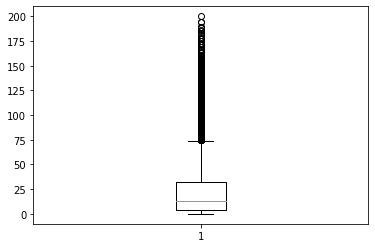

In [13]:
# Detecting outliers
plt.boxplot(data['Runs'])

count    55926.000000
mean        22.241413
std         25.552421
min          0.000000
25%          4.000000
50%         13.000000
75%         32.000000
max        200.000000
Name: Runs, dtype: float64

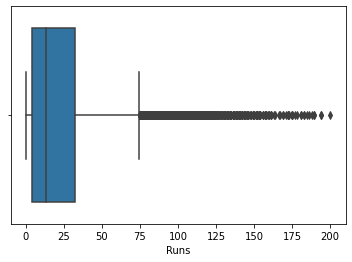

In [14]:
sns.boxplot(data['Runs'])
data['Runs'].describe() #Average (mean) run is 22.24, whisker show outliers

In [15]:
# One Hot Encoding
pd.get_dummies(data['Country'])

,Afghanistan,Australia,Bangladesh,Bermuda,Canada,East Africa,England,Hong Kong,India,Ireland,...,Netherlands,New Zealand,Pakistan,Scotland,South Africa,Sri Lanka,United Arab Emirates,United States,West Indies,Zimbabwe
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55921,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
55922,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
55923,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
55924,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


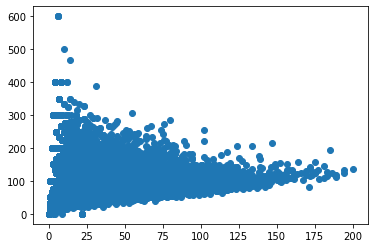

In [16]:
# Basic Plots - box, bar, scatter, point etc...
plt.scatter(data['Runs'], data['ScoreRate'])

In [ ]:
matches_played = data['Country'].value_counts()

In [ ]:
plt.plot(matches_played)

In [22]:
# Split Train Test Data
# 20% to test 
# 80% to train
from sklearn.model_selection import train_test_split
train, test = train_test_split(data, 
                              test_size = 0.2,
                              random_state = 10)

In [ ]:
train.head()

In [ ]:
test.shape

In [ ]:
data.shape

In [ ]:
#One hot encoding - adding column and label
departments = pd.Series(['Sales Executive','Human Resources','Research Scientist','Manager','Department Head'])
pd.get_dummies(departments)

In [ ]:
df = pd.DataFrame({'departments': departments,'age':[10,20,30,40,50]})
pd.get_dummies(df)